In [117]:
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

expmt = "10000_0.1_1_0.5_0.5_uniform_uniform_0.0_30_False_1000_5"
dataset_name = 'ml-20m-uniform'

results_pth = '../results/' + dataset_name + '/Weighted/' + expmt + '/results_df'
init_idxs_pth = '../results/' + dataset_name + '/Weighted/' + expmt + '/init_mats.pkl'
obse_idxs_pth = '../results/' + dataset_name + '/Weighted/' + expmt + '/observed_mats.pkl'
user_mses_pth = '../results/' + dataset_name + '/Weighted/' + expmt + '/user_mses.pkl'

In [118]:
obse_idxs = pickle.load(open(obse_idxs_pth, 'rb'))
init_idxs = pickle.load(open(init_idxs_pth, 'rb'))
user_mses = pickle.load(open(user_mses_pth, 'rb'))
results = pd.read_csv(results_pth)
n_runs = len(obse_idxs)
print("# of Runs: ", n_runs)

# of Runs:  4


In [119]:
def get_user_cost(n_users, obse_idx):
    user_cost = np.zeros(n_users)
    user_feature_map = []
    for idx in obse_idx:
        user_cost[idx[0]] += 1
    return user_cost

def get_high_freq_users(X, n_users, n_feats, obse_idx):
    n_features = X.shape[1]
    user_cost = get_user_cost(n_users, obse_idx)
    return np.where(user_cost >= n_feats/2)[0]

In [120]:
user_mses.shape

(4, 10, 5000)

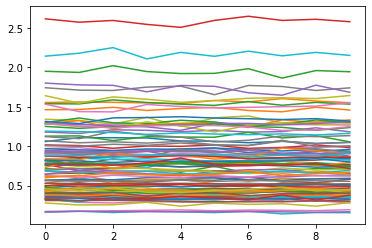

In [121]:
first_run = user_mses[0]
first_run = first_run.T
for i in range(100):
    plt.plot(first_run[i])
    

(array([4.125e+03, 6.390e+02, 1.550e+02, 5.300e+01, 1.800e+01, 6.000e+00,
        1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00]),
 array([  2.,  45.,  88., 131., 174., 217., 260., 303., 346., 389., 432.]),
 <a list of 10 Patch objects>)

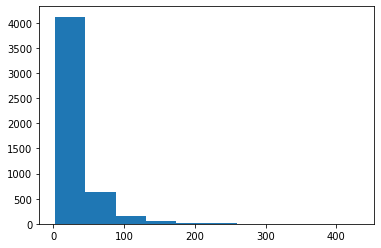

In [123]:
import sys
sys.path.append("../")
from utils.dataset_helpers import set_to_array
user_costs = get_user_cost(5000, set_to_array(np.expand_dims(obse_idxs[0][5],0)[0]))
plt.hist(user_costs)

In [125]:
from scipy.stats import pearsonr
run_no = 1
interval_no = 4
n_runs = 5
n_intervals = 10
for run_no in range(n_runs):
    for interval_no in range(n_intervals):
        run_observed_idxs = set_to_array(np.expand_dims(obse_idxs[run_no][interval_no],0))[0]
        run_init_idxs = set_to_array(np.expand_dims(init_idxs[run_no],0)[0])
        run_user_costs = get_user_cost(5000, run_observed_idxs)
        run_user_init_costs = get_user_cost(5000, run_init_idxs)
        run_user_mses = user_mses[run_no][interval_no]
        print(pearsonr(run_user_init_costs, run_user_mses), pearsonr(run_user_costs, run_user_mses))

(-0.059839781098680954, 2.2952202432708633e-05) (-0.05998727995964565, 2.1907824188656487e-05)
(-0.06043628584908059, 1.899983556915317e-05) (-0.06087638105425708, 1.6508834273237226e-05)
(-0.06049367259712432, 1.8655823048523907e-05) (-0.06087819105269593, 1.6499263237454677e-05)
(-0.05949014040992616, 2.5620327667408786e-05) (-0.059834645852060754, 2.2989402802771054e-05)
(-0.06086636773967017, 1.6561879031875555e-05) (-0.061248005011175166, 1.465079955178362e-05)
(-0.06065115455663196, 1.774198678656208e-05) (-0.061073638157846964, 1.549630148527777e-05)
(-0.06026660569579807, 2.0052691371588682e-05) (-0.06023067371427411, 2.0282663752425717e-05)
(-0.06073440080560484, 1.727631388260727e-05) (-0.060855473646637126, 1.661977407897513e-05)
(-0.06107654034747199, 1.5481855769257578e-05) (-0.0611067289634309, 1.5332350366097945e-05)
(-0.060369440515502894, 1.9408164753652738e-05) (-0.060507669421941586, 1.8572821498870544e-05)
(-0.06608165774496833, 2.9163829699106922e-06) (-0.066052203

IndexError: index 4 is out of bounds for axis 0 with size 4

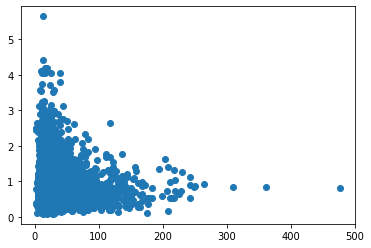

In [126]:
plt.scatter(run_user_costs[np.argsort(run_user_costs)], run_user_mses[np.argsort(run_user_costs)])

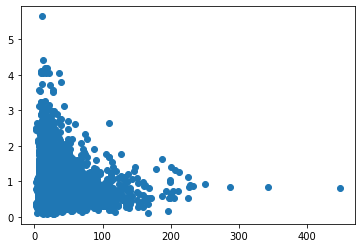

In [127]:
plt.scatter(run_user_init_costs[np.argsort(run_user_init_costs)], run_user_mses[np.argsort(run_user_init_costs)])

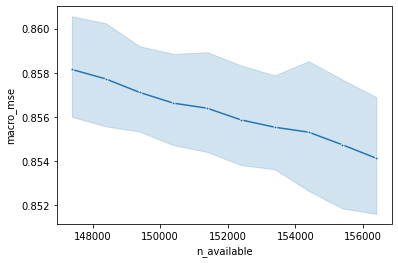

In [128]:
sns.lineplot(x='n_available', y='macro_mse', data=results, marker='.')